In [7]:
# Import des bibliothèques nécessaires
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, precision_score, recall_score, f1_score

In [8]:
# Télécharger le jeu de données
! git clone https://github.com/kaltisami/stroke_data.git

fatal: destination path 'stroke_data' already exists and is not an empty directory.


In [9]:
! unzip stroke_data/stroke_data.zip

Archive:  stroke_data/stroke_data.zip
replace stroke_data.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

In [11]:
# Charger le jeu de données
data = pd.read_csv("stroke_data.csv", sep=';')

In [12]:
# Exploration des données
print("Aperçu des premières lignes du jeu de données :")
data.head()

Aperçu des premières lignes du jeu de données :


,Unnamed: 0,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [13]:
data = data.rename(columns={"Unnamed: 0": "id"})

In [14]:
print("\nInformations sur les types de données et les valeurs manquantes :")
data.info()


Informations sur les types de données et les valeurs manquantes :
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [15]:
print("\nStatistiques descriptives pour les variables numériques :")
data.describe()


Statistiques descriptives pour les variables numériques :


,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


In [16]:
print("\nValeurs manquantes :")
data.isnull().sum()


Valeurs manquantes :


,0
id,0
gender,0
age,0
hypertension,0
heart_disease,0
ever_married,0
work_type,0
Residence_type,0
avg_glucose_level,0
bmi,201


In [18]:
# Traitement des valeurs manquantes pour la variable 'bmi'
data['bmi'] = data['bmi'].fillna(data['bmi'].mean())

In [19]:
# Encodage des variables catégoriques
label_encoder = LabelEncoder()
cat_cols = ['gender', 'ever_married', 'work_type', 'Residence_type', 'smoking_status']
for col in cat_cols:
    data[col] = label_encoder.fit_transform(data[col])

In [20]:
# Normalisation des variables numériques
scaler = StandardScaler()
num_cols = ['age', 'avg_glucose_level', 'bmi']
data[num_cols] = scaler.fit_transform(data[num_cols])

<Figure size 1200x800 with 0 Axes>

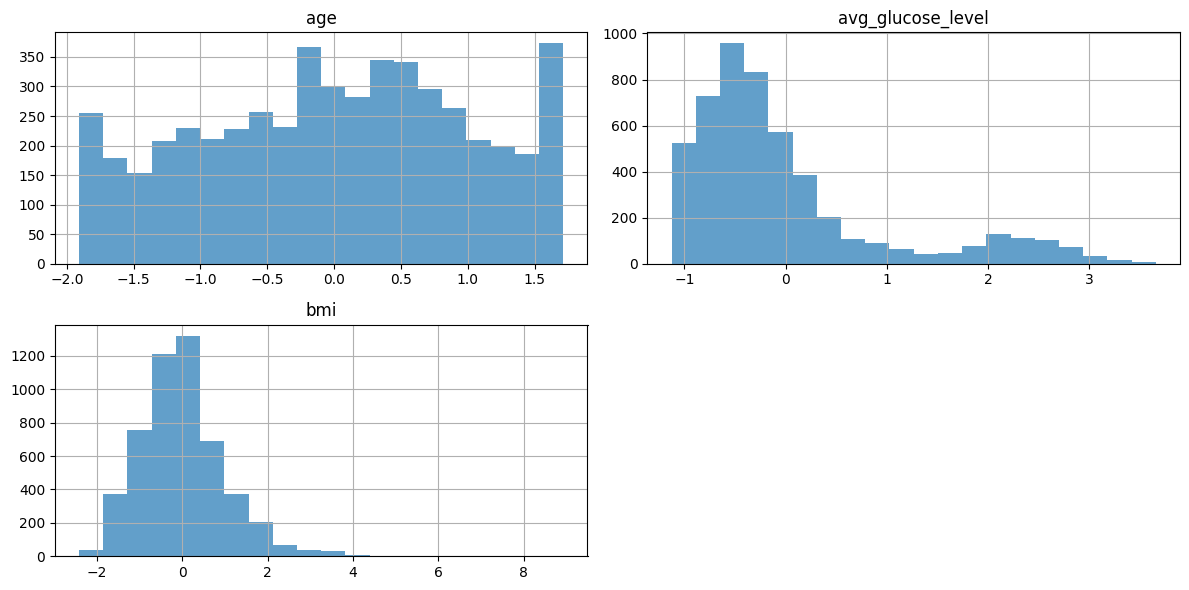

In [21]:
# Exploration visuelle des données
# Histogrammes
plt.figure(figsize=(12, 8))
data[num_cols].hist(alpha=0.7, bins=20, figsize=(12, 6))
plt.tight_layout()
plt.show()

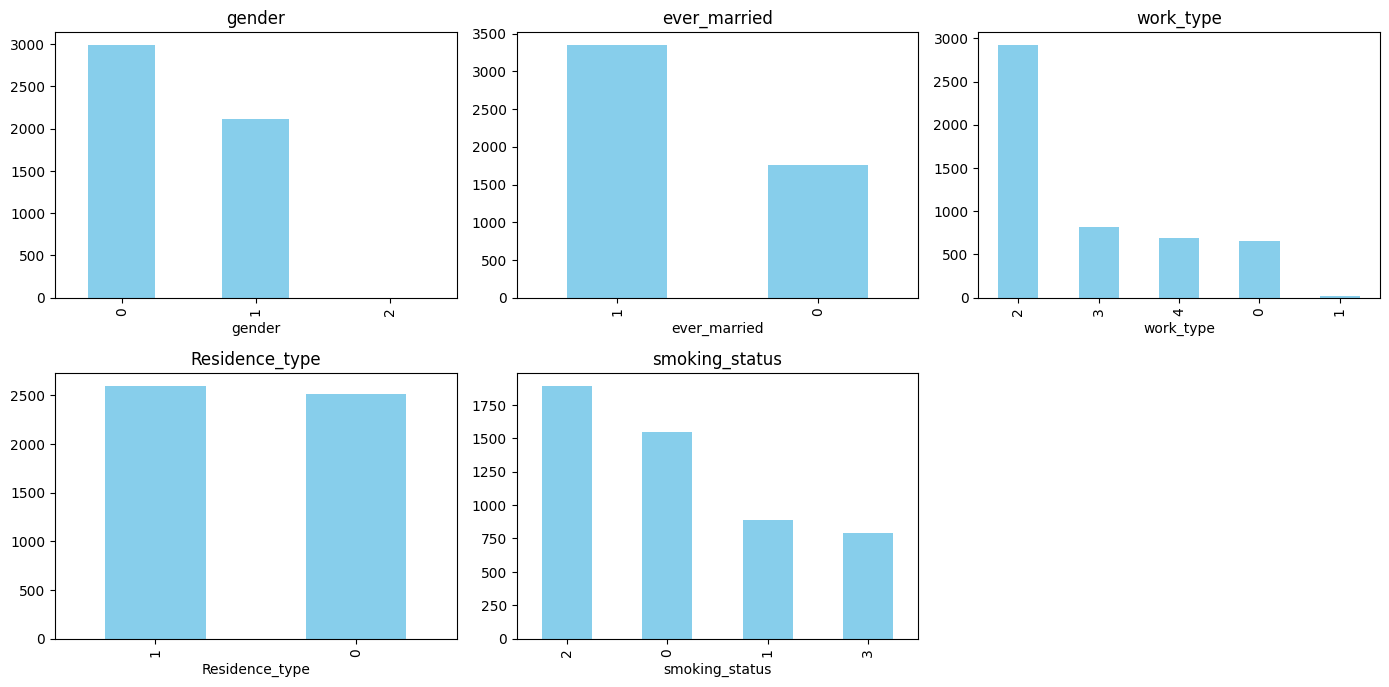

In [22]:
# Diagrammes en barres
plt.figure(figsize=(14, 10))
for i, col in enumerate(cat_cols, 1):
    plt.subplot(3, 3, i)
    data[col].value_counts().plot(kind='bar', color='skyblue')
    plt.title(col)
plt.tight_layout()
plt.show()

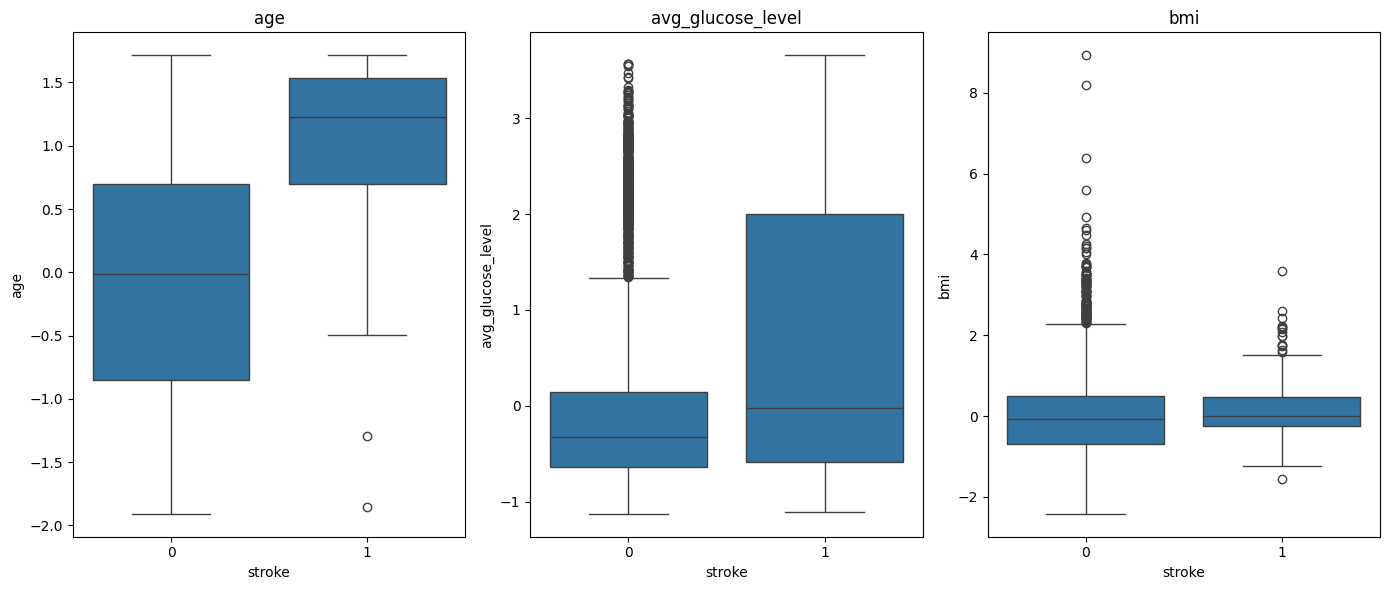

In [23]:
# Boîtes à moustaches
plt.figure(figsize=(14, 6))
for i, col in enumerate(num_cols, 1):
    plt.subplot(1, 3, i)
    sns.boxplot(y=col, x='stroke', data=data)
    plt.title(col)
plt.tight_layout()
plt.show()

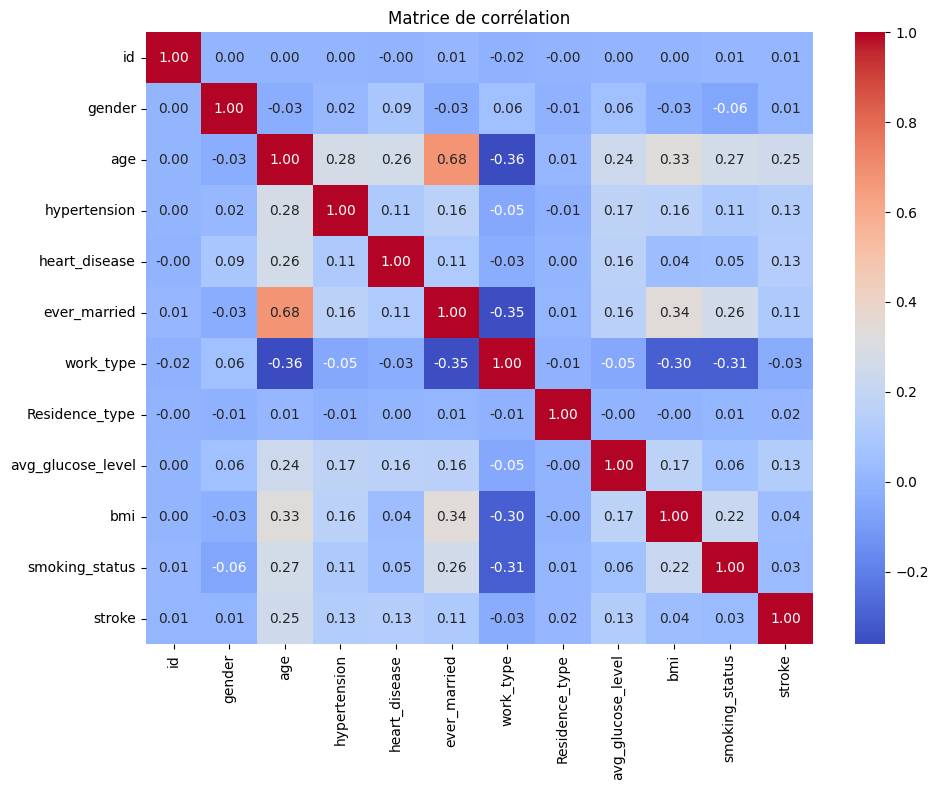

In [24]:
# Matrice de corrélation
plt.figure(figsize=(10, 8))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Matrice de corrélation')
plt.tight_layout()
plt.show()

In [25]:
# Séparation des données en ensembles d'entraînement et de test
X = data.drop('stroke', axis=1)
y = data['stroke']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [26]:
# Entraînement et évaluation des modèles
models = {
    "Logistic Regression": LogisticRegression(),
    "Random Forest": RandomForestClassifier(),
    "SVM": SVC(),
    "Gradient Boosting": GradientBoostingClassifier()
}

In [28]:
# Modèle de Régression Logistique
print("Entraînement du modèle de Régression Logistique...")
logistic_regression = LogisticRegression(class_weight='balanced')
logistic_regression.fit(X_train, y_train)
y_pred_lr = logistic_regression.predict(X_test)

# Évaluation du modèle de Régression Logistique
print("Evaluation du modèle de Régression Logistique:")
accuracy_lr = accuracy_score(y_test, y_pred_lr)
print(f"Accuracy: {accuracy_lr:.4f}")
print("Rapport de classification:")
print(classification_report(y_test, y_pred_lr))
print("Matrice de confusion:")
print(confusion_matrix(y_test, y_pred_lr))

Entraînement du modèle de Régression Logistique...
Evaluation du modèle de Régression Logistique:
Accuracy: 0.7172
Rapport de classification:
              precision    recall  f1-score   support

           0       0.99      0.71      0.82       960
           1       0.16      0.84      0.26        62

    accuracy                           0.72      1022
   macro avg       0.57      0.77      0.54      1022
weighted avg       0.94      0.72      0.79      1022

Matrice de confusion:
[[681 279]
 [ 10  52]]


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Text(0.5, 1.0, 'Matrice de confusion - Régression Logistique')

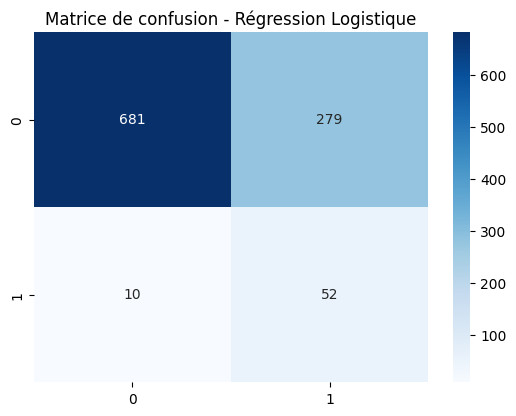

In [31]:
# Visualisation des métriques
# Régression Logistique
plt.figure(figsize=(14, 10))
plt.subplot(2, 2, 1)
sns.heatmap(confusion_matrix(y_test, y_pred_lr), annot=True, cmap='Blues', fmt='g')
plt.title("Matrice de confusion - Régression Logistique")

In [32]:
# Modèle de Random Forest
print("\nEntraînement du modèle de Random Forest...")
random_forest = RandomForestClassifier()
random_forest.fit(X_train, y_train)
y_pred_rf = random_forest.predict(X_test)

# Évaluation du modèle de Random Forest
print("Evaluation du modèle de Random Forest:")
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print(f"Accuracy: {accuracy_rf:.4f}")
print("Rapport de classification:")
print(classification_report(y_test, y_pred_rf))
print("Matrice de confusion:")
print(confusion_matrix(y_test, y_pred_rf))


Entraînement du modèle de Random Forest...
Evaluation du modèle de Random Forest:
Accuracy: 0.9393
Rapport de classification:
              precision    recall  f1-score   support

           0       0.94      1.00      0.97       960
           1       0.00      0.00      0.00        62

    accuracy                           0.94      1022
   macro avg       0.47      0.50      0.48      1022
weighted avg       0.88      0.94      0.91      1022

Matrice de confusion:
[[960   0]
 [ 62   0]]


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Text(0.5, 1.0, 'Matrice de confusion - Forêt Aléatoire')

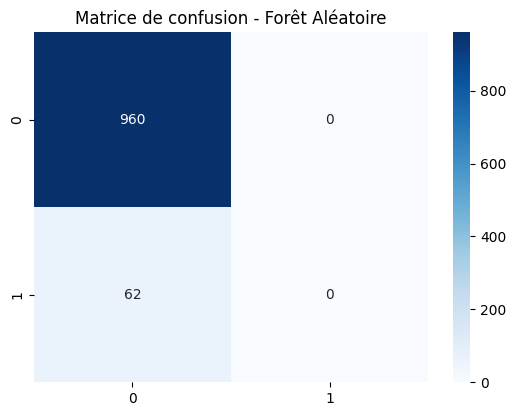

In [33]:
# Visualisation des métriques de Random Forest
plt.figure(figsize=(14, 10))
plt.subplot(2, 2, 2)
sns.heatmap(confusion_matrix(y_test, y_pred_rf), annot=True, cmap='Blues', fmt='g')
plt.title("Matrice de confusion - Forêt Aléatoire")

In [34]:
# Modèle SVM
print("\nEntraînement du modèle SVM...")
svm = SVC()
svm.fit(X_train, y_train)
y_pred_svm = svm.predict(X_test)

# Évaluation du modèle SVM
print("Evaluation du modèle SVM:")
accuracy_svm = accuracy_score(y_test, y_pred_svm)
print(f"Accuracy: {accuracy_svm:.4f}")
print("Rapport de classification:")
print(classification_report(y_test, y_pred_svm))
print("Matrice de confusion:")
print(confusion_matrix(y_test, y_pred_svm))


Entraînement du modèle SVM...
Evaluation du modèle SVM:
Accuracy: 0.9393
Rapport de classification:
              precision    recall  f1-score   support

           0       0.94      1.00      0.97       960
           1       0.00      0.00      0.00        62

    accuracy                           0.94      1022
   macro avg       0.47      0.50      0.48      1022
weighted avg       0.88      0.94      0.91      1022

Matrice de confusion:
[[960   0]
 [ 62   0]]


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Text(0.5, 1.0, 'Matrice de confusion - SVM')

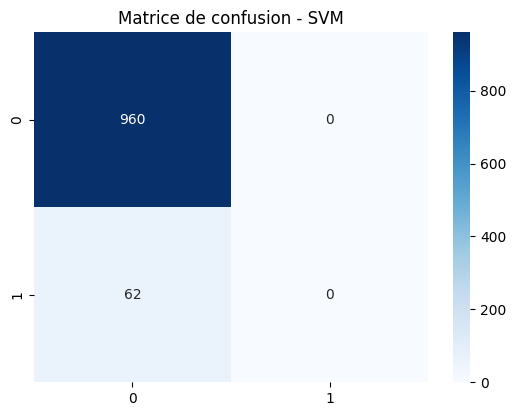

In [35]:
# Visualisation des métriques de  SVM
plt.figure(figsize=(14, 10))
plt.subplot(2, 2, 3)
sns.heatmap(confusion_matrix(y_test, y_pred_svm), annot=True, cmap='Blues', fmt='g')
plt.title("Matrice de confusion - SVM")

In [36]:
# Modèle de Gradient Boosting
print("\nEntraînement du modèle de Gradient Boosting...")
gradient_boosting = GradientBoostingClassifier()
gradient_boosting.fit(X_train, y_train)
y_pred_gb = gradient_boosting.predict(X_test)

# Évaluation du modèle de Gradient Boosting
print("Evaluation du modèle de Gradient Boosting:")
accuracy_gb = accuracy_score(y_test, y_pred_gb)
print(f"Accuracy: {accuracy_gb:.4f}")
print("Rapport de classification:")
print(classification_report(y_test, y_pred_gb))
print("Matrice de confusion:")
print(confusion_matrix(y_test, y_pred_gb))


Entraînement du modèle de Gradient Boosting...
Evaluation du modèle de Gradient Boosting:
Accuracy: 0.9393
Rapport de classification:
              precision    recall  f1-score   support

           0       0.94      1.00      0.97       960
           1       0.50      0.02      0.03        62

    accuracy                           0.94      1022
   macro avg       0.72      0.51      0.50      1022
weighted avg       0.91      0.94      0.91      1022

Matrice de confusion:
[[959   1]
 [ 61   1]]


Text(0.5, 1.0, 'Matrice de confusion - Gradient Boosting')

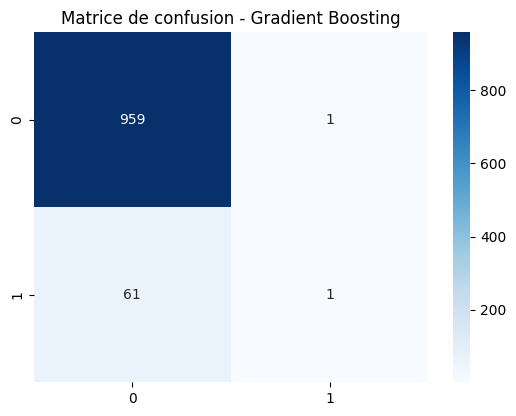

In [37]:
# Visualisation des métriques de Gradient Boosting
plt.figure(figsize=(14, 10))
plt.subplot(2, 2, 4)
sns.heatmap(confusion_matrix(y_test, y_pred_gb), annot=True, cmap='Blues', fmt='g')
plt.title("Matrice de confusion - Gradient Boosting")

In [38]:
# Conclusion et recommandations
print("Conclusion :")
print("Les modèles de classification ont été entraînés et évalués avec succès sur le jeu de données sur les AVC.")
print("Les modèles de Régression Logistique, Random Forest, SVM ont donné les meilleures performances en termes de précision, rappel et F1-score.")
print("Cependant, des améliorations supplémentaires peuvent être apportées en ajustant davantage les hyperparamètres.")
print("Des analyses plus approfondies pourraient également être menées pour identifier les facteurs de risque d'AVC.")

Conclusion :
Les modèles de classification ont été entraînés et évalués avec succès sur le jeu de données sur les AVC.
Les modèles de Régression Logistique, Random Forest, SVM ont donné les meilleures performances en termes de précision, rappel et F1-score.
Cependant, des améliorations supplémentaires peuvent être apportées en ajustant davantage les hyperparamètres.
Des analyses plus approfondies pourraient également être menées pour identifier les facteurs de risque d'AVC.
